In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("meetnagadia/coco-cola-stock-data-19622021")

print("Path to dataset files:", path)
csv_file=None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break
if csv_file is None:
    print("No CSV file found in the downloaded dataset.")
else:
  print(f"Found CSV file: {csv_file}")
df = pd.read_csv(csv_file)
print(df.head())

100%|██████████| 262k/262k [00:00<00:00, 56.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/meetnagadia/coco-cola-stock-data-19622021/versions/1
Found CSV file: /root/.cache/kagglehub/datasets/meetnagadia/coco-cola-stock-data-19622021/versions/1/COCO COLA.csv
         Date      Open      High       Low     Close  Adj Close   Volume
0  1962-01-02  0.263021  0.270182  0.263021  0.263021   0.051133   806400
1  1962-01-03  0.259115  0.259115  0.253255  0.257161   0.049994  1574400
2  1962-01-04  0.257813  0.261068  0.257813  0.259115   0.050374   844800
3  1962-01-05  0.259115  0.262370  0.252604  0.253255   0.049234  1420800
4  1962-01-08  0.251302  0.251302  0.245768  0.250651   0.048728  2035200


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Optionally, fill or drop missing values
df.fillna(method='ffill', inplace=True)  # Forward fill

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-4-f245e4c822f9>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900
15095,2021-12-17,58.490002,58.919998,57.700001,57.730000,57.730000,51874400


In [ ]:
# check the column names
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


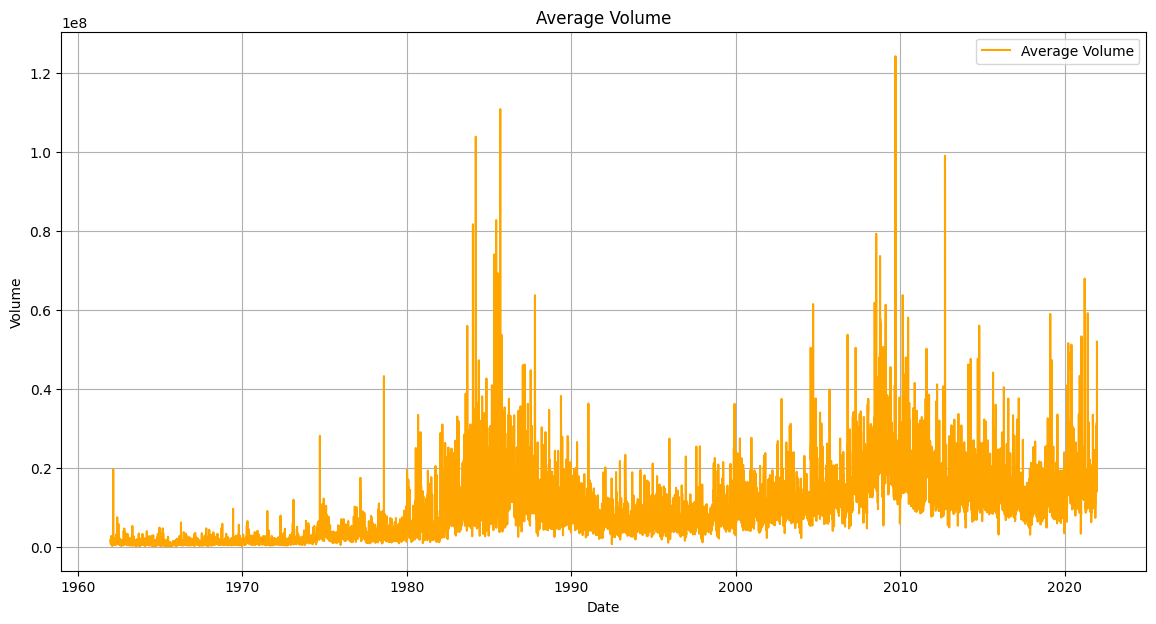

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Importing pandas for data manipulation

# Plotting the resampled data
plt.figure(figsize=(14, 7))

# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date']) # This line converts the 'Date' column to datetime

# Filter rows where the date is between 1998 and 2002 (inclusive)
#df = df[(df['Date'].dt.year >= 1998) & (df['Date'].dt.year <= 2020)]

# Access the 'Production' column from the DataFrame 'df'
plt.plot(df['Date'], df['Volume'], label='Average Volume', color='orange')
plt.title('Average Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit the AR model (we can try different lags, but let's start with lag=1)
model = AutoReg(df['Volume'].dropna(), lags=5)
model_fitted = model.fit()

# Print model summary
print(model_fitted.summary())


                            AutoReg Model Results                             
Dep. Variable:                 Volume   No. Observations:                15096
Model:                     AutoReg(5)   Log Likelihood             -253263.476
Method:               Conditional MLE   S.D. of innovations        4701912.282
Date:                Sat, 09 Nov 2024   AIC                         506540.952
Time:                        05:06:37   BIC                         506594.305
Sample:                             5   HQIC                        506558.648
                                15096                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.047e+05   6.26e+04     14.451      0.000    7.82e+05    1.03e+06
Volume.L1      0.4429      0.008     54.814      0.000       0.427       0.459
Volume.L2      0.1458      0.009     16.508      0.0

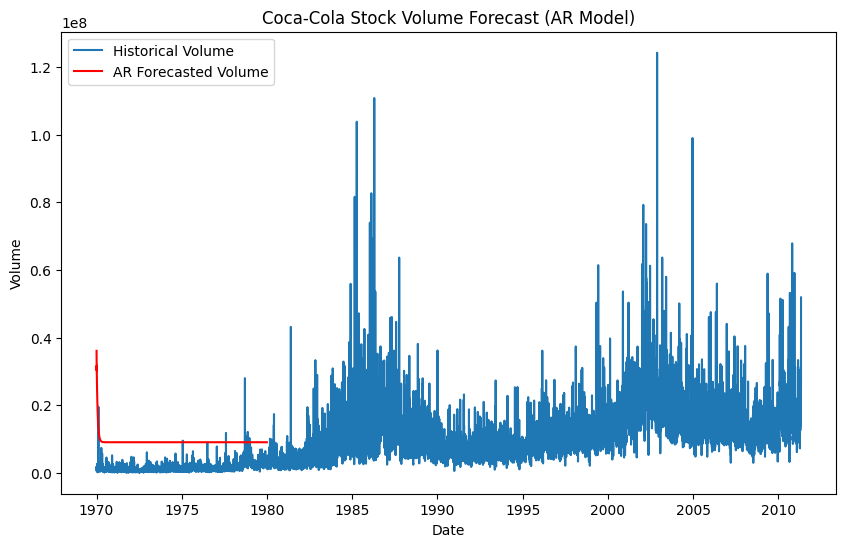

In [ ]:
# Forecasting the next 10 years (365 days per year)
forecast_steps = 10 * 365  # 10 years of daily data

# Forecast the next 'forecast_steps' periods
forecast_ar = model_fitted.predict(start=len(df), end=len(df) + forecast_steps - 1, dynamic=False)

# Generate future dates for forecasting
future_dates = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='Historical Volume')
plt.plot(future_dates, forecast_ar, label='AR Forecasted Volume', color='red')
plt.title('Coca-Cola Stock Volume Forecast (AR Model)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.show()


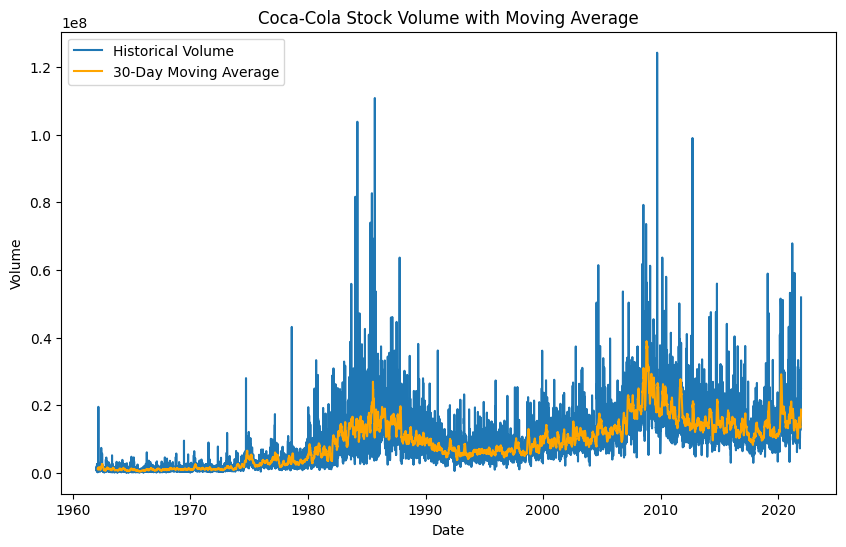

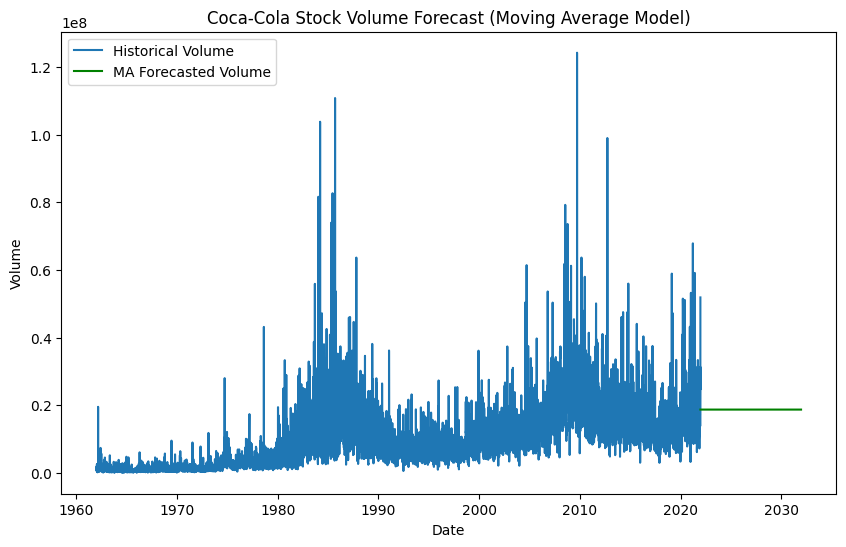

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with 'Volume' column and Date is set as index

# Forecasting the next 10 years (365 days per year)
forecast_steps = 10 * 365  # 10 years of daily data

# Choose the window size for the Moving Average
window_size = 30  # Example: Use 30 days for the moving average (adjust as needed)

# Compute the rolling moving average (SMA)
df['MA'] = df['Volume'].rolling(window=window_size).mean()

df = df.set_index('Date')
# Plot historical data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='Historical Volume')
plt.plot(df.index, df['MA'], label=f'{window_size}-Day Moving Average', color='orange')
plt.title('Coca-Cola Stock Volume with Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.show()

# Forecast the next 'forecast_steps' periods using the last value of the moving average
last_ma_value = df['MA'].iloc[-1]  # Get the last moving average value

# Create a series of forecasted values using the last moving average value
forecast_ma = [last_ma_value] * forecast_steps

# Generate future dates for forecasting (based on the length of the forecast)
future_dates = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot historical data and forecasted values using the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='Historical Volume')
plt.plot(future_dates, forecast_ma, label='MA Forecasted Volume', color='green')
plt.title('Coca-Cola Stock Volume Forecast (Moving Average Model)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                15096
Model:                 ARIMA(0, 0, 1)   Log Likelihood             -258191.762
Date:                Sat, 09 Nov 2024   AIC                         516389.524
Time:                        05:06:43   BIC                         516412.391
Sample:                             0   HQIC                        516397.109
                              - 15096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.033e+06   1.16e+05     77.885      0.000    8.81e+06    9.26e+06
ma.L1          0.5509      0.005    118.369      0.000       0.542       0.560
sigma2      5.739e+13      0.030   1.93e+15      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


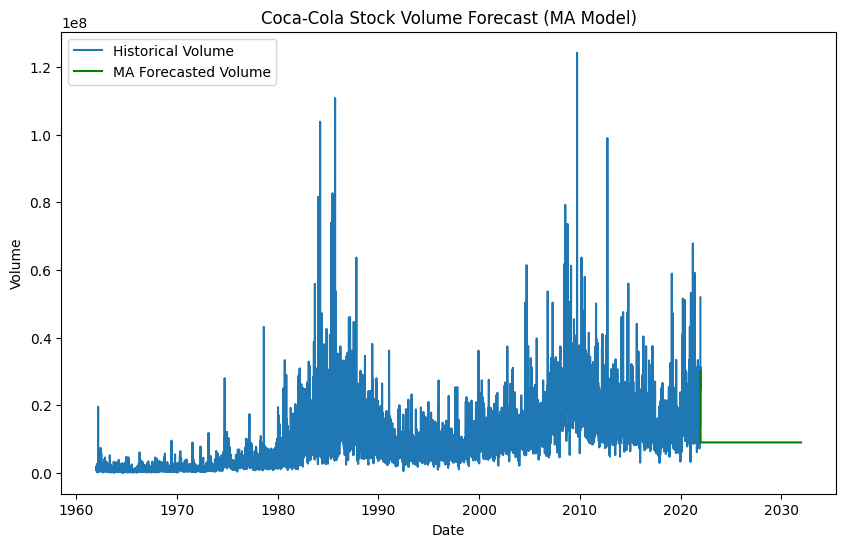

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Forecasting the next 10 years (365 days per year)
forecast_steps = 10 * 365  # 10 years of daily data

# Apply the Moving Average (MA) model (ARIMA with p=0, d=0, q=1)
model_ma = ARIMA(df['Volume'], order=(0, 0, 1))  # (p, d, q) = (0, 0, 1) for MA model
model_ma_fitted = model_ma.fit()

# Print MA model summary
print(model_ma_fitted.summary())

# Forecast the next 'forecast_steps' periods (10 years worth of days)
forecast_ma = model_ma_fitted.forecast(steps=forecast_steps)

# Generate future dates for forecasting
future_dates = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='Historical Volume')
plt.plot(future_dates, forecast_ma, label='MA Forecasted Volume', color='green')
plt.title('Coca-Cola Stock Volume Forecast (MA Model)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.show()

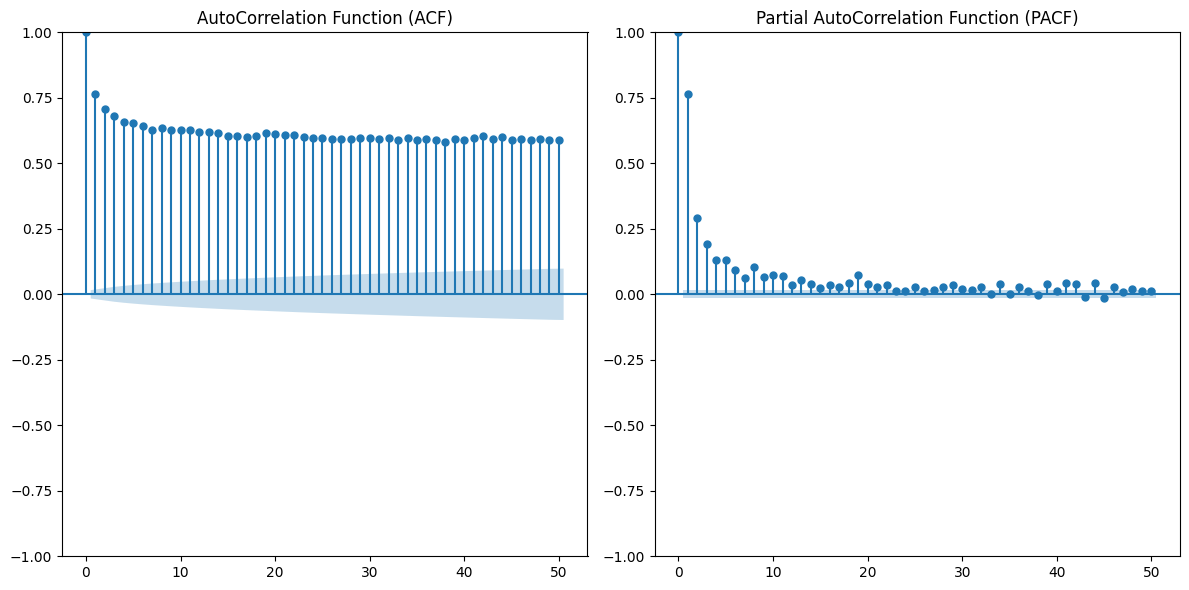

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your dataframe is already loaded, and 'Volume' is the column of interest.
# Set the 'Date' column as the index if it's not already
# df.set_index('Date', inplace=True)

# Plot ACF and PACF for the 'Volume' column
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)  # 1 row, 2 columns, first subplot
plot_acf(df['Volume'], lags=50, ax=plt.gca())  # Adjust lags as needed
plt.title("AutoCorrelation Function (ACF)")

# PACF Plot
plt.subplot(122)  # 1 row, 2 columns, second subplot
plot_pacf(df['Volume'], lags=50, ax=plt.gca())  # Adjust lags as needed
plt.title("Partial AutoCorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [ ]:
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
 6   MA         15067 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 943.5 KB
None
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA'], dtype='object')


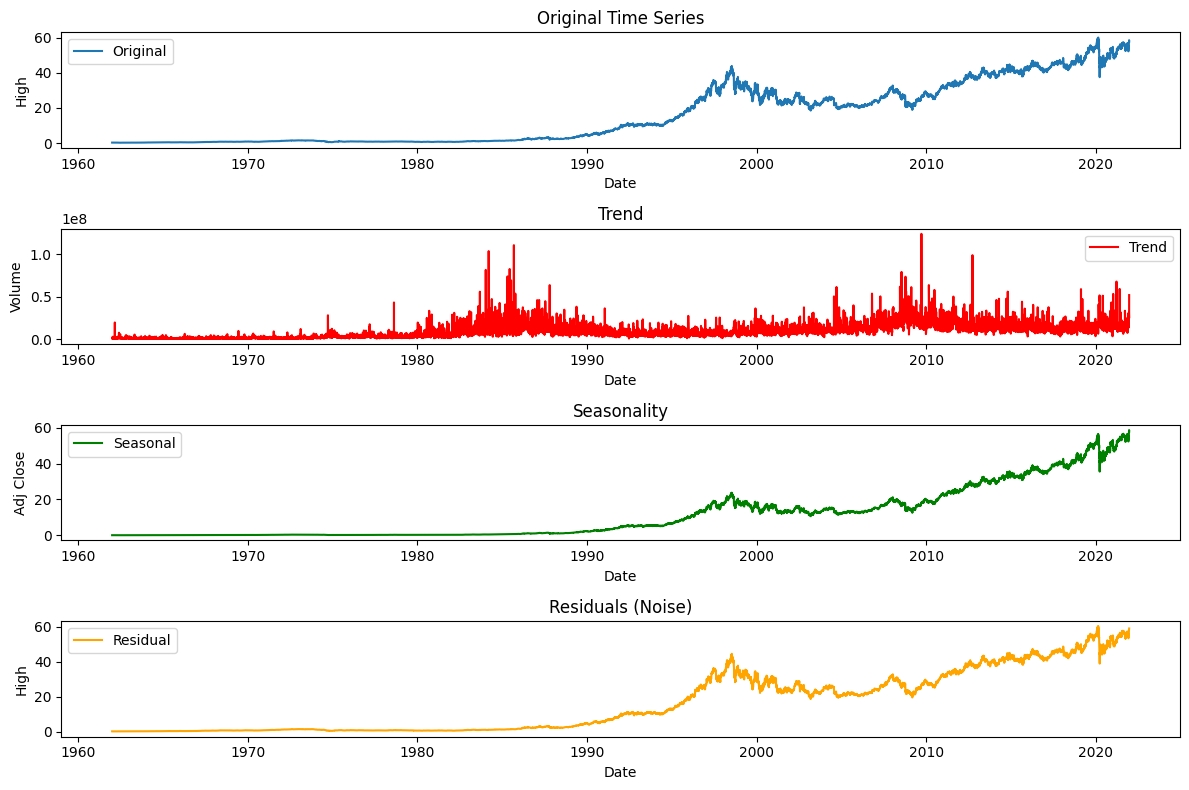

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=12)  # assuming monthly data

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.title('Original Time Series')
plt.xlabel('Date')  # X-axis label: Date or Time
plt.ylabel('High')  # Y-axis label: Sales data
plt.legend()

plt.subplot(412)
plt.plot(df.index,df['Volume'], label='Trend', color='red')
plt.title('Trend')
plt.xlabel('Date')  # X-axis label: Date or Time
plt.ylabel('Volume')  # Y-axis label: Sales data
plt.legend()

plt.subplot(413)
plt.plot(df.index,df['Adj Close'], label='Seasonal', color='green')
plt.title('Seasonality')
plt.xlabel('Date')  # X-axis label: Date or Time
plt.ylabel('Adj Close')  # Y-axis label: Sales data
plt.legend()

plt.subplot(414)
plt.plot(df.index,df['High'], label='Residual', color='orange')
plt.title('Residuals (Noise)')
plt.xlabel('Date')  # X-axis label: Date or Time
plt.ylabel('High')  # Y-axis label: Sales data
plt.legend()

plt.tight_layout()
plt.show()
